In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

d = pd.read_csv('aggregation/analysis_df_11012024.csv')

In [42]:
d.columns

Index(['BoroName', 'BoroCT2020', 'NTAName', 'CDTANAME', 'PUMA', 'NTA2020',
       'CDTA2020', 'n_total', 'n_classified_positive', 'n_tp', 'n_fp', 'n_tn',
       'n_fn', 'total_not_annotated', 'positives_not_annotated',
       'negatives_not_annotated', 'empirical_estimate_ct', 'p_y',
       'p_y_CI_lower', 'p_y_CI_upper', 'at_least_one_positive_image_by_area',
       'at_least_one_positive_image_by_area_CI_lower',
       'at_least_one_positive_image_by_area_CI_upper', 'total_population',
       'nhl_white_alone', 'nhl_black_alone', 'hispanic_alone',
       'nhl_asian_alone', 'total_households', 'num_households_with_internet',
       'num_households_with_smartphone', 'median_household_income',
       'num_high_school_graduates', 'num_bachelors_degree',
       'num_graduate_degree', 'num_limited_english_speaking_households',
       'ft_elevation_min', 'ft_elevation_max', 'ft_elevation_mean', 'area',
       'n_floodnet_sensors', 'dep_moderate_1_area', 'dep_moderate_2_area',
       'dep_mo

# basic exploratory analysis

In [43]:
pd.set_option('display.max_columns', 500)
d['p_y_percentile'] = d['p_y'].rank(pct=True) * 100
d['confirmed_flooded_image'] = d['at_least_one_positive_image_by_area'] == 1

d['white_frac'] = d['nhl_white_alone'] / d['total_population'] 
d['black_frac'] = d['nhl_black_alone'] / d['total_population']
d['hispanic_frac'] = d['hispanic_alone'] / d['total_population']
d['asian_frac'] = d['nhl_asian_alone'] / d['total_population']

d.head()


,BoroName,BoroCT2020,NTAName,CDTANAME,PUMA,NTA2020,CDTA2020,n_total,n_classified_positive,n_tp,n_fp,n_tn,n_fn,total_not_annotated,positives_not_annotated,negatives_not_annotated,empirical_estimate_ct,p_y,p_y_CI_lower,p_y_CI_upper,at_least_one_positive_image_by_area,at_least_one_positive_image_by_area_CI_lower,at_least_one_positive_image_by_area_CI_upper,total_population,nhl_white_alone,nhl_black_alone,hispanic_alone,nhl_asian_alone,total_households,num_households_with_internet,num_households_with_smartphone,median_household_income,num_high_school_graduates,num_bachelors_degree,num_graduate_degree,num_limited_english_speaking_households,ft_elevation_min,ft_elevation_max,ft_elevation_mean,area,n_floodnet_sensors,dep_moderate_1_area,dep_moderate_2_area,dep_moderate_1_frac,dep_moderate_2_frac,GEOID,sewer_backup_311c,street_flooding_311c,manhole_overflow_311c,catch_basin_clogged/flooding_311c,highway_flooding_311c,p_y_percentile,confirmed_flooded_image,white_frac,black_frac,hispanic_frac,asian_frac
0,Manhattan,1000100,The Battery-Governors Island-Ellis Island-Libe...,MN01 Financial District-Tribeca (CD 1 Equivalent),4121,MN0191,MN01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.057156,3.386975e-313,1.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,-666666666,0,0,0,0,0.0,19.0,8.153329,1.842850e+06,0.0,0.000000,0.000000,0.000000,0.000000,36061000100,0,0,0,0,0,98.150538,False,NaN,NaN,NaN,NaN
1,Manhattan,1000201,Chinatown-Two Bridges,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4103,MN0301,MN03,320.0,0.0,0.0,0.0,0.0,0.0,320.0,0.0,320.0,0.000000,0.002501,3.394007e-05,0.015286,0.358249,0.010802,0.992768,2666,238,216,1747,400,878,726,740,45582,324,120,130,155,0.0,37.0,10.417681,9.723159e+05,0.0,0.000000,0.000000,0.000000,0.000000,36061000201,0,0,0,0,0,54.193548,False,0.089272,0.081020,0.655289,0.150038
2,Manhattan,1000600,Chinatown-Two Bridges,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4103,MN0301,MN03,845.0,2.0,1.0,0.0,1.0,0.0,843.0,1.0,843.0,0.002367,0.009022,5.469974e-04,0.030567,1.000000,1.000000,1.000000,10751,859,654,3301,5567,5191,3792,3773,25655,2074,1559,268,1777,0.0,41.0,10.160654,2.582715e+06,0.0,22125.725302,6619.532228,0.008567,0.002563,36061000600,0,0,0,0,0,89.677419,True,0.079900,0.060832,0.307041,0.517812
3,Manhattan,1001401,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4103,MN0302,MN03,182.0,0.0,0.0,0.0,0.0,0.0,182.0,0.0,182.0,0.000000,0.001656,3.105866e-05,0.010369,0.190792,0.005637,0.849985,3165,2224,85,314,251,1648,1300,1287,89873,310,867,863,111,24.0,43.0,34.847163,1.006120e+06,0.0,0.000000,0.000000,0.000000,0.000000,36061001401,0,0,0,0,0,32.387097,False,0.702686,0.026856,0.099210,0.079305
4,Manhattan,1001402,Lower East Side,MN03 Lower East Side-Chinatown (CD 3 Equivalent),4103,MN0302,MN03,771.0,0.0,0.0,0.0,1.0,0.0,770.0,0.0,771.0,0.000000,0.000989,3.676340e-06,0.006344,0.328103,0.002830,0.992603,3286,881,250,860,1099,1733,1335,1452,46615,550,896,300,545,13.0,42.0,27.553037,1.226211e+06,0.0,3803.485935,3611.188630,0.003102,0.002945,36061001402,0,0,0,0,0,11.311828,False,0.268107,0.076080,0.261716,0.334449


In [44]:
d[['dep_moderate_1_area', 'dep_moderate_2_area']].describe()

,dep_moderate_1_area,dep_moderate_2_area
count,2325.000000,2325.000000
mean,33568.760303,17255.146006
std,77947.773371,49174.765211
min,0.000000,0.000000
25%,0.000000,0.000000
50%,5218.905103,0.000000
75%,33654.810667,9687.678466
max,886801.431017,660823.683992


In [45]:
d[['p_y', 'empirical_estimate_ct', 'at_least_one_positive_image_by_area']].corr(method='spearman')

,p_y,empirical_estimate_ct,at_least_one_positive_image_by_area
p_y,1.000000,0.431617,0.448244
empirical_estimate_ct,0.431617,1.000000,0.576621
at_least_one_positive_image_by_area,0.448244,0.576621,1.000000


In [46]:
d[['p_y', 'empirical_estimate_ct', 'at_least_one_positive_image_by_area']].corr(method='pearson')

,p_y,empirical_estimate_ct,at_least_one_positive_image_by_area
p_y,1.000000,0.925180,0.362018
empirical_estimate_ct,0.925180,1.000000,0.385908
at_least_one_positive_image_by_area,0.362018,0.385908,1.000000


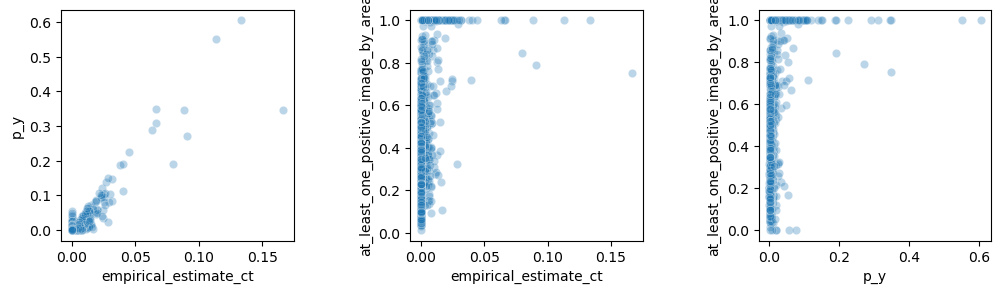

In [47]:
# pairplot of these three using seaborn
plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
sns.scatterplot(data=d, x='empirical_estimate_ct', y='p_y', alpha=0.3)
plt.subplot(1, 3, 2)
sns.scatterplot(data=d, x='empirical_estimate_ct', y='at_least_one_positive_image_by_area', alpha=0.3)
plt.subplot(1, 3, 3)
sns.scatterplot(data=d, x='p_y', y='at_least_one_positive_image_by_area', alpha=0.3)
plt.subplots_adjust(wspace=0.5)



# 311

### sanity check: all correlations are positive. 

Optimization terminated successfully.
         Current function value: 0.399734
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.394818
         Iterations 6


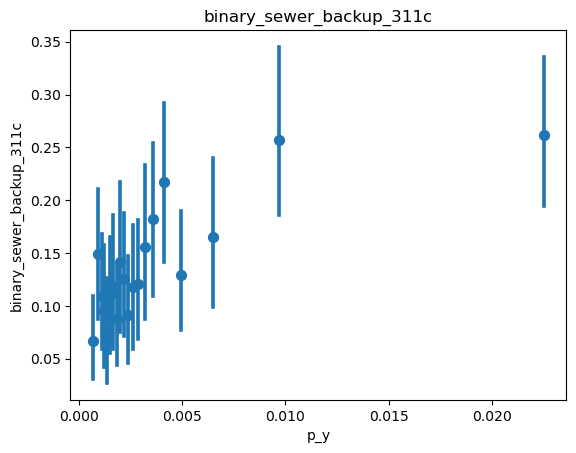

Optimization terminated successfully.
         Current function value: 0.234303
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.237964
         Iterations 7


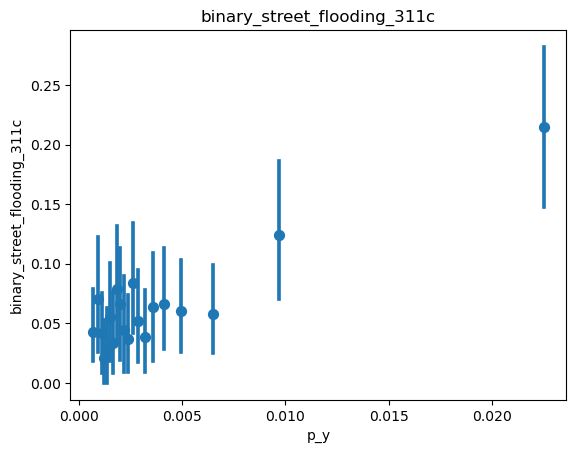

Optimization terminated successfully.
         Current function value: 0.050356
         Iterations 9
Optimization terminated successfully.
         Current function value: 0.050254
         Iterations 9


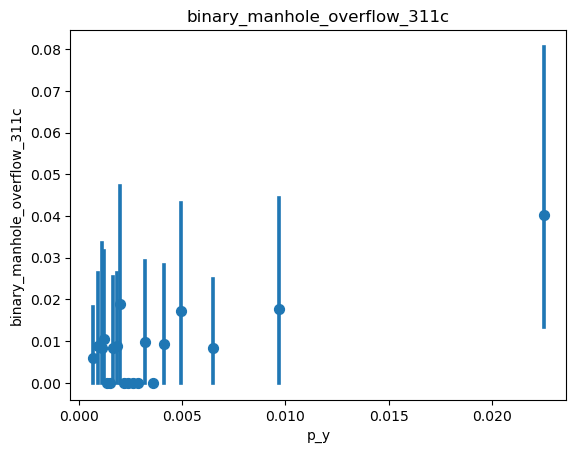

Optimization terminated successfully.
         Current function value: 0.232237
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.232932
         Iterations 7


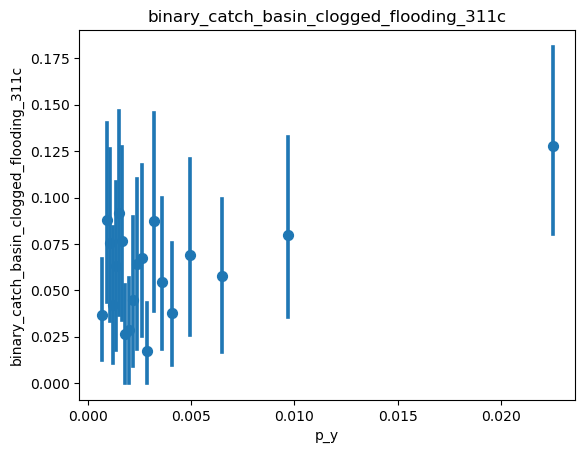

Optimization terminated successfully.
         Current function value: 0.003642
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.002500
         Iterations 18


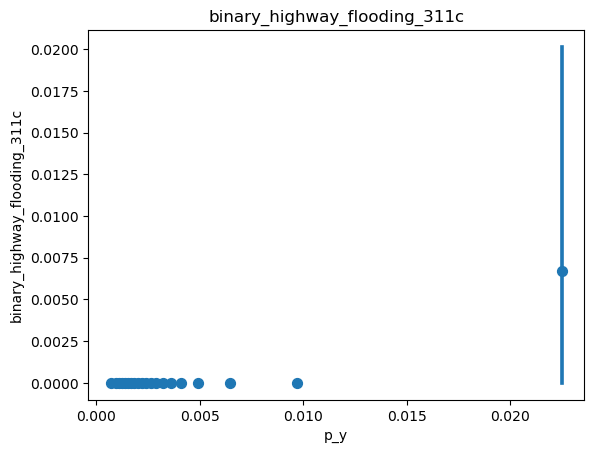

Optimization terminated successfully.
         Current function value: 0.516887
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.517786
         Iterations 5


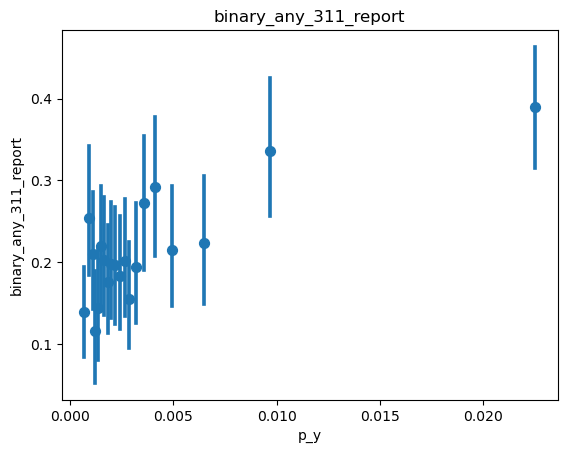

,binary_sewer_backup_311c I,binary_sewer_backup_311c II,binary_street_flooding_311c I,binary_street_flooding_311c II,binary_manhole_overflow_311c I,binary_manhole_overflow_311c II,binary_catch_basin_clogged_flooding_311c I,binary_catch_basin_clogged_flooding_311c II,binary_highway_flooding_311c I,binary_highway_flooding_311c II,binary_any_311_report I,binary_any_311_report II
Intercept,-1.8807***,-2.5280***,-2.7912***,-3.5039***,-4.7969***,-5.8003***,-2.7536***,-2.9439***,-7.9003***,-55.1961,-1.3638***,-1.7685***
,(0.0624),(0.1383),(0.0896),(0.2036),(0.2289),(0.5796),(0.0883),(0.1808),(1.0649),(50.3953),(0.0535),(0.1089)
p_y,6.6984***,,13.5508***,,7.0902***,,4.7517***,,7.8134,,11.2050***,
,(1.8164),,(2.4361),,(2.3026),,(1.7961),,(6.6627),,(2.4560),
p_y_percentile,,0.0131***,,0.0155***,,0.0191**,,0.0045,,0.5138,,0.0094***
,,(0.0022),,(0.0030),,(0.0083),,(0.0030),,(0.5139),,(0.0018)


In [48]:
all_311_models = []
d['any_311_report'] = False
for k in d.columns:
    if '311' in k:
        d['any_311_report'] = d['any_311_report'] | (d[k] > 0) 

for k in d.columns:
    if ('311' in k):
        col_name = ('binary_%s' % k).replace('/', '_')
        d[col_name] = (d[k] > 0) * 1.
        all_311_models.append(sm.Logit.from_formula('%s ~ p_y' % col_name, data = d).fit())
        all_311_models.append(sm.Logit.from_formula('%s ~ p_y_percentile' % col_name, data = d).fit())
        # plot probability of 311 report as function of p_y
        plt.figure()
        sns.regplot(data=d, x='p_y', y=col_name,  x_bins=20, fit_reg=False)
        plt.title(col_name)
        plt.show()
        del d[col_name]
    

summary_col(all_311_models, stars=True)

### still, our model identifies lots of high-risk areas with no 311 reports!

In [49]:
for percentile in [80, 90, 95]:
    print("Fraction of locations at percentile %i or higher of p_y with no 311 report: %2.3f" % (percentile, 1 - d.loc[d['p_y_percentile'] >= percentile, 'any_311_report'].mean()))
    print("Population in these locations: %2.3f" % d.loc[(d['p_y_percentile'] >= percentile) & (d['any_311_report'] == 0), 'total_population'].sum())
print("fraction of locations with confirmed positive image with no 311 report: %2.3f" % (1 - d.loc[d['confirmed_flooded_image'], 'any_311_report'].mean()))
print("Population in these locations: %2.3f" % d.loc[(d['confirmed_flooded_image'] == 1) & (d['any_311_report'] == 0), 'total_population'].sum())

Fraction of locations at percentile 80 or higher of p_y with no 311 report: 0.700
Population in these locations: 1046658.000
Fraction of locations at percentile 90 or higher of p_y with no 311 report: 0.618
Population in these locations: 429460.000
Fraction of locations at percentile 95 or higher of p_y with no 311 report: 0.581
Population in these locations: 200598.000
fraction of locations with confirmed positive image with no 311 report: 0.643
Population in these locations: 325045.000


### preliminary estimate of bias (todo: redo this with better measures of race and demographics). 

In [50]:
d['any_311_report'] = d['any_311_report'] * 1.


race_models = []
for col in ['white_frac', 'black_frac', 'hispanic_frac', 'asian_frac']:
    race_models.append(sm.Logit.from_formula('any_311_report ~ p_y + %s' % col, data = d).fit())
    race_models.append(sm.Logit.from_formula('any_311_report ~ at_least_one_positive_image_by_area + %s' % col, data = d).fit())
    race_models.append(sm.Logit.from_formula('any_311_report ~ confirmed_flooded_image + %s' % col, data = d).fit())
summary_col(race_models, stars=True)

Optimization terminated successfully.
         Current function value: 0.522661
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.520867
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.526382
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.521880
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.518246
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.525201
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.515792
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.514366
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.519318
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.523177
  

,any_311_report I,any_311_report II,any_311_report III,any_311_report IIII,any_311_report IIIII,any_311_report IIIIII,any_311_report IIIIIII,any_311_report IIIIIIII,any_311_report IIIIIIIII,any_311_report IIIIIIIIII,any_311_report IIIIIIIIIII,any_311_report IIIIIIIIIIII
Intercept,-1.4316***,-1.7720***,-1.3960***,-1.4487***,-1.9246***,-1.4317***,-0.9840***,-1.3800***,-0.9505***,-1.3511***,-1.7300***,-1.3079***
,(0.0797),(0.1012),(0.0787),(0.0706),(0.1040),(0.0698),(0.0818),(0.1092),(0.0808),(0.0706),(0.0977),(0.0690)
p_y,15.7978***,,,16.0792***,,,15.6473***,,,16.0002***,,
,(3.2520),,,(3.3223),,,(3.2935),,,(3.2807),,
white_frac,0.2760,0.1055,0.2609,,,,,,,,,
,(0.1802),(0.1833),(0.1800),,,,,,,,,
at_least_one_positive_image_by_area,,1.3877***,,,1.4825***,,,1.3425***,,,1.4050***,
,,(0.1903),,,(0.1903),,,(0.1903),,,(0.1886),
confirmed_flooded_image[T.True],,,0.9461***,,,0.9666***,,,0.9387***,,,0.9543***
,,,(0.1767),,,(0.1769),,,(0.1779),,,(0.1765)


In [51]:
# internet access models 
# num_households_with_internet, num_households_with_smartphone 

d['frac_internet'] = d['num_households_with_internet'] / d['total_households']
d['frac_smartphone'] = d['num_households_with_smartphone'] / d['total_households']

internet_models = []
for col in ['frac_internet', 'frac_smartphone']:
    internet_models.append(sm.Logit.from_formula('any_311_report ~ p_y + %s' % col, data = d).fit())
    internet_models.append(sm.Logit.from_formula('any_311_report ~ confirmed_flooded_image + %s' % col, data = d).fit())

summary_col(internet_models, stars=True)


Optimization terminated successfully.
         Current function value: 0.522528
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.526404
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.523854
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.527394
         Iterations 5


,any_311_report I,any_311_report II,any_311_report III,any_311_report IIII
Intercept,-2.7235***,-2.4289***,-1.8944***,-1.5734***
,(0.5447),(0.5348),(0.5504),(0.5369)
p_y,16.1626***,,16.0323***,
,(3.3157),,(3.3033),
frac_internet,1.5733**,1.2742**,,
,(0.6135),(0.6041),,
confirmed_flooded_image[T.True],,0.9804***,,0.9815***
,,(0.1791),,(0.1789)
frac_smartphone,,,0.6294,0.2991
,,,(0.6201),(0.6069)


In [52]:
# num limited english speaking households 
d['frac_limited_english'] = d['num_limited_english_speaking_households'] / d['total_households']

limited_english_models = []
for col in ['frac_limited_english']:
    limited_english_models.append(sm.Logit.from_formula('any_311_report ~ p_y + %s' % col, data = d).fit())
    limited_english_models.append(sm.Logit.from_formula('any_311_report ~ confirmed_flooded_image + %s' % col, data = d).fit())

summary_col(limited_english_models, stars=True)

Optimization terminated successfully.
         Current function value: 0.522460
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.525926
         Iterations 5


,any_311_report I,any_311_report II
Intercept,-1.1945***,-1.1709***
,(0.0762),(0.0750)
p_y,16.3104***,
,(3.3339),
frac_limited_english,-1.0726***,-1.0270**
,(0.4066),(0.4023)
confirmed_flooded_image[T.True],,1.0119***
,,(0.1799)


In [53]:
# elevation models 
elevation_models = []

for col in ['ft_elevation_min','ft_elevation_mean','ft_elevation_max']:
    elevation_models.append(sm.Logit.from_formula('any_311_report ~ p_y + %s' % col, data = d).fit())
    elevation_models.append(sm.Logit.from_formula('any_311_report ~ confirmed_flooded_image + %s' % col, data = d).fit())

summary_col(elevation_models, stars=True)

Optimization terminated successfully.
         Current function value: 0.513053
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.515933
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.512318
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.514862
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.512005
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.514222
         Iterations 6


,any_311_report I,any_311_report II,any_311_report III,any_311_report IIII,any_311_report IIIII,any_311_report IIIIII
Intercept,-1.1450***,-1.1190***,-1.0387***,-1.0033***,-0.9794***,-0.9350***
,(0.0735),(0.0737),(0.0880),(0.0877),(0.0970),(0.0959)
p_y,9.6919***,,9.5075***,,9.9203***,
,(2.3585),,(2.3636),,(2.4088),
ft_elevation_min,-0.0076***,-0.0078***,,,,
,(0.0019),(0.0019),,,,
confirmed_flooded_image[T.True],,0.6165***,,0.6253***,,0.6950***
,,(0.1728),,(0.1723),,(0.1712)
ft_elevation_mean,,,-0.0065***,-0.0069***,,
,,,(0.0015),(0.0015),,


In [54]:
# educational attainment 
d['frac_hs'] = d['num_high_school_graduates'] / d['total_population']
d['frac_bachelors'] = d['num_bachelors_degree'] / d['total_population']
d['frac_grad'] = d['num_graduate_degree'] / d['total_population']

education_models = []
for col in ['frac_hs', 'frac_bachelors', 'frac_grad']:
    education_models.append(sm.Logit.from_formula('any_311_report ~ p_y + %s' % col, data = d).fit())
    education_models.append(sm.Logit.from_formula('any_311_report ~ confirmed_flooded_image + %s' % col, data = d).fit())

summary_col(education_models, stars=True)


Optimization terminated successfully.
         Current function value: 0.523041
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.526590
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.522669
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.526545
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.523019
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.526562
         Iterations 5


,any_311_report I,any_311_report II,any_311_report III,any_311_report IIII,any_311_report IIIII,any_311_report IIIIII
Intercept,-1.4384***,-1.4405***,-1.4850***,-1.4197***,-1.2936***,-1.2470***
,(0.1309),(0.1300),(0.1081),(0.1058),(0.0812),(0.0795)
p_y,16.0469***,,16.1804***,,15.9798***,
,(3.2923),,(3.2952),,(3.2813),
frac_hs,0.5433,0.7315,,,,
,(0.6860),(0.6805),,,,
confirmed_flooded_image[T.True],,0.9623***,,0.9545***,,0.9594***
,,(0.1768),,(0.1766),,(0.1767)
frac_bachelors,,,0.8428,0.6427,,
,,,(0.5530),(0.5496),,


# flood risk areas

## TODO: currently I just implemented a pretty sketchy version of flood risk by setting dep_light_3_area > 0.

fraction of areas with light flood risk using this measure: 0.472
Optimization terminated successfully.
         Current function value: 0.690050
         Iterations 5
                                             Logit Regression Results                                             
Dep. Variable:     preliminary_measure_of_city_predicted_light_flood_risk   No. Observations:                 2325
Model:                                                              Logit   Df Residuals:                     2323
Method:                                                               MLE   Df Model:                            1
Date:                                                    Fri, 01 Nov 2024   Pseudo R-squ.:                0.002251
Time:                                                            14:08:19   Log-Likelihood:                -1604.4
converged:                                                           True   LL-Null:                       -1608.0
Covariance Type:           

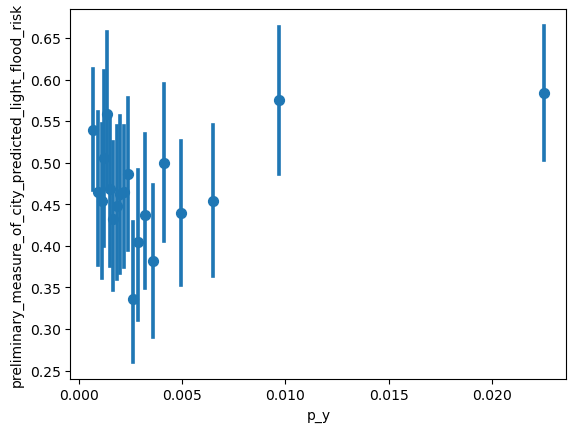

In [56]:
d['preliminary_measure_of_city_predicted_light_flood_risk'] = (d['dep_moderate_2_area'] > 0) * 1
d['frac_flooded_above_thres'] = d['dep_moderate_2_frac'] > 0.005
print("fraction of areas with light flood risk using this measure: %2.3f" % d['preliminary_measure_of_city_predicted_light_flood_risk'].mean())
print(sm.Logit.from_formula('preliminary_measure_of_city_predicted_light_flood_risk ~ p_y', data = d).fit().summary())
plt.figure()
sns.regplot(data=d, x='p_y', y='preliminary_measure_of_city_predicted_light_flood_risk',  x_bins=20, fit_reg=False)
plt.show()
    



fraction of areas with moderate flood risk using this measure: 0.472
Optimization terminated successfully.
         Current function value: 0.690050
         Iterations 5
                                               Logit Regression Results                                              
Dep. Variable:     preliminary_measure_of_city_predicted_moderate_flood_risk   No. Observations:                 2325
Model:                                                                 Logit   Df Residuals:                     2323
Method:                                                                  MLE   Df Model:                            1
Date:                                                       Fri, 01 Nov 2024   Pseudo R-squ.:                0.002251
Time:                                                               14:08:20   Log-Likelihood:                -1604.4
converged:                                                              True   LL-Null:                       -1608.0
Cov

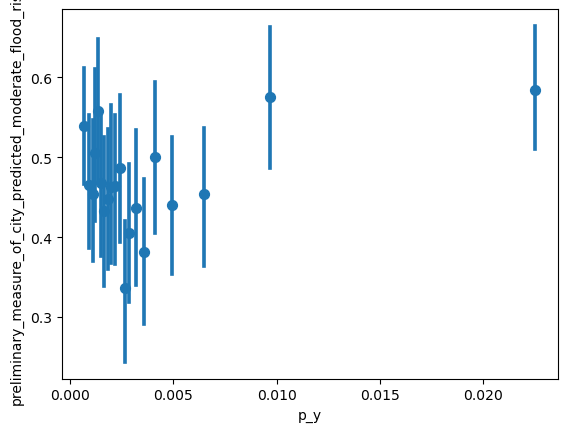

In [57]:
d['preliminary_measure_of_city_predicted_moderate_flood_risk'] = (d['dep_moderate_2_area'] > 0) * 1
print("fraction of areas with moderate flood risk using this measure: %2.3f" % d['preliminary_measure_of_city_predicted_moderate_flood_risk'].mean())
print(sm.Logit.from_formula('preliminary_measure_of_city_predicted_moderate_flood_risk ~ p_y', data = d).fit().summary())
plt.figure()
sns.regplot(data=d, x='p_y', y='preliminary_measure_of_city_predicted_moderate_flood_risk',  x_bins=20, fit_reg=False)
plt.show()
    



# flood sensors

In [58]:
d['any_sensors'] = d['n_floodnet_sensors'] > 0
for percentile in [80, 90, 95]:
    print("Fraction of locations at percentile %i or higher of p_y with no sensors: %2.3f" % (percentile, 1 - d.loc[d['p_y_percentile'] >= percentile, 'any_sensors'].mean()))
    print("Population in these locations: %2.3f" % d.loc[(d['p_y_percentile'] >= percentile) & (d['any_sensors'] == 0), 'total_population'].sum())
print("fraction of locations with confirmed positive image with no sensors: %2.3f" % (1 - d.loc[d['confirmed_flooded_image'], 'any_sensors'].mean()))
print("Population in these locations: %2.3f" % d.loc[(d['confirmed_flooded_image'] == 1) & (d['any_sensors'] == 0), 'total_population'].sum())

Fraction of locations at percentile 80 or higher of p_y with no sensors: 0.946
Population in these locations: 1469346.000
Fraction of locations at percentile 90 or higher of p_y with no sensors: 0.936
Population in these locations: 702558.000
Fraction of locations at percentile 95 or higher of p_y with no sensors: 0.915
Population in these locations: 356846.000
fraction of locations with confirmed positive image with no sensors: 0.917
Population in these locations: 505984.000
